In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(insurance_data['region'].value_counts())
insurance_data['region'] = insurance_data['region'].astype('category')
print(insurance_data['region'].cat.categories)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cf = ColumnTransformer(transformers=[('encoding', OneHotEncoder(), ['sex', 'smoker', 'region'] )], remainder='passthrough')
df_new = pd.DataFrame(cf.fit_transform(insurance_data))

In [ ]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


In [ ]:
insurance_oht = pd.get_dummies(insurance_data)
insurance_oht.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_oht.drop('charges', axis=1)
y = insurance_oht['charges']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [ ]:
tf.random.set_seed(42)

In [ ]:
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 8629.0449 - mae: 8629.0449
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7788.2100 - mae: 7788.2100
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7588.7554 - mae: 7588.7554
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7733.7129 - mae: 7733.7129
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7647.4326 - mae: 7647.4326
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7602.2686 - mae: 7602.2686
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7521.0303 - mae: 7521.0303
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 7791.2627 - mae: 7791.2627
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7490.5195 - mae: 7490.5195
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7679.9541 - mae: 7679.9541

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7244.7920 - mae: 7244.7920


[7244.7919921875, 7244.7919921875]

# Tuning the Model

#Optimizer Adam and Leraning rate added

In [ ]:
tf.random.set_seed(42)

In [ ]:
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [ ]:
history = insurance_model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 12941.4131 - mae: 12941.4131
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 10526.2100 - mae: 10526.2100
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 7664.7422 - mae: 7664.7422
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 7419.3062 - mae: 7419.3062
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 7342.0449 - mae: 7342.0449
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 7277.4189 - mae: 7277.4189
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 7192.2603 - mae: 7192.2603
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 7114.1084 - mae: 7114.1084
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 7029.2021 - mae: 7029.2021
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 6940.4292 - mae: 6940.

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7244.7920 - mae: 7244.7920


[7244.7919921875, 7244.7919921875]

In [ ]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.3062 - mae: 3163.3062


[3163.30615234375, 3163.30615234375]

Text(0, 0.5, 'loss')

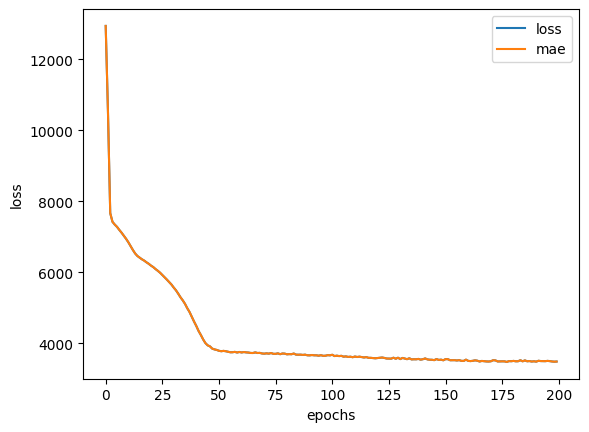

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

# Scaling the data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']), remainder='passthrough')
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children'])])

In [ ]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Model3

In [ ]:
tf.random.set_seed(42)

In [ ]:
insurance_model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          loss=tf.keras.losses.mae, metrics='mae')

In [ ]:
insurance_model3.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13318.0625 - mae: 13318.0625
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13133.5098 - mae: 13133.5098
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12679.3184 - mae: 12679.3184
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11916.5547 - mae: 11916.5547
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10940.9072 - mae: 10940.9072
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9985.0352 - mae: 9985.0352
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 9163.6660 - mae: 9163.6660
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 8563.3887 - mae: 8563.3887
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8180.6777 - mae: 8180.6777
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7945.0908 - mae: